In [2]:
from database.MongoDBConnector import MongoDBConnector
from utils.uc import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [3]:
mongo = MongoDBConnector(mode='remote')

onset_data = await mongo.get_all_documents(coll_name="model_data_onset")

print(len(onset_data))

### UC Preprocessing

In [5]:
uc_data = [np.array(i["uc"], dtype=float) for i in onset_data]

In [6]:
uc_cleaned = []
for i in tqdm(uc_data):

    cleaned = uc_preprocess(i)

    uc_cleaned.append(cleaned)

100%|██████████| 3733/3733 [02:14<00:00, 27.83it/s]


In [11]:
uc_features = []
for i in tqdm(uc_data):

    uc_extracted = extract_uc_features(i)

    uc_features.append(uc_extracted)

100%|██████████| 3733/3733 [00:32<00:00, 116.35it/s]


In [12]:
sample = 11

pd.DataFrame(uc_features[sample])

,t_start,t_end,coverage,uc_mad_local,uc_prominence_used,uc_n_contr,uc_amp_mean,uc_dur_mean,uc_ici_mean,uc_duty_cycle,uc_rise_slope_mean,uc_fall_slope_mean,uc_area_mean,uc_amp_sd,uc_dur_sd,uc_ici_sd,uc_dom_freq,uc_power_sub003,uc_total_power,uc_spec_entropy
0,0,120,1.0,2.000001,2.000001,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.008333,202.804007,220.526483,1.891163
1,30,150,1.0,2.500001,2.500001,1,12.0,83.0,0.0,0.691667,0.214286,-0.444444,499.5,0.0,0.0,0.0,0.008333,19.265511,19.557843,1.444684
2,60,180,1.0,2.500001,2.500001,1,11.0,72.0,0.0,0.600000,0.244444,-0.444444,418.0,0.0,0.0,0.0,0.008333,22.542104,23.304589,1.653651
3,90,210,1.0,2.000001,2.000001,1,5.0,51.0,0.0,0.425000,0.208333,-0.444444,60.0,0.0,0.0,0.0,0.008333,11.707297,12.482729,1.771700
4,120,240,1.0,1.500001,1.500001,1,2.0,64.0,0.0,0.533333,0.087719,-0.285714,191.0,0.0,0.0,0.0,0.008333,1.677802,2.234414,3.105848
5,150,270,1.0,1.000001,1.000001,1,2.0,13.0,0.0,0.108333,0.333333,-0.285714,16.5,0.0,0.0,0.0,0.008333,1.474513,2.130413,3.288091
6,180,300,1.0,2.000001,2.000001,1,9.0,83.0,0.0,0.691667,0.415385,-0.500000,784.5,0.0,0.0,0.0,0.008333,21.711807,25.053707,1.601854
7,210,330,1.0,8.000001,8.000001,1,9.0,83.0,0.0,0.691667,0.415385,-0.500000,784.5,0.0,0.0,0.0,0.008333,47.971213,60.942225,2.116631
8,240,360,1.0,2.000001,2.000001,1,14.0,115.0,0.0,0.958333,0.742857,-0.175000,1715.5,0.0,0.0,0.0,0.008333,18.357973,25.618475,2.664849
9,270,390,1.0,2.000001,2.000001,1,18.0,112.0,0.0,0.933333,2.250000,-0.240385,801.0,0.0,0.0,0.0,0.008333,12.043755,12.543750,1.339826


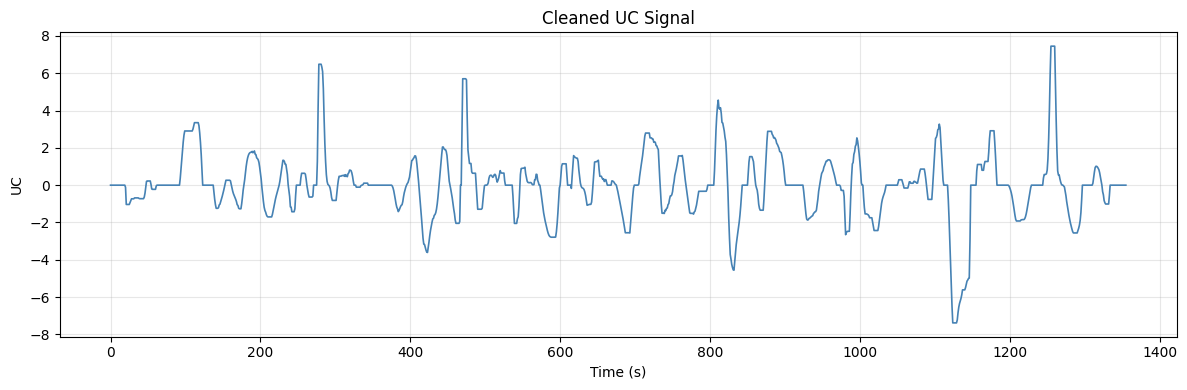

In [9]:
t = np.arange(len(uc_cleaned[sample])) / 1.0

plt.figure(figsize=(12, 4))
plt.plot(t, uc_cleaned[sample], lw=1.2, color='steelblue')
plt.xlabel("Time (s)")
plt.ylabel("UC")
plt.title("Cleaned UC Signal")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()